# **EDA**

## ANÁLISIS BASE

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
df_drugs = pd.read_csv("../data/data_clean/drugs.csv", index_col=0)
df_drugs_no_na = pd.read_csv("../data/data_clean/drugs_no_na.csv", index_col=0)

In [7]:
df_drugs

,country,survey_year,prevalence_(%),substance,recall_period,age,sample_size,males_(%),females_(%),gender_gap
0,Austria,2020,22.7,Cannabis,Lifetime,Adults (15-64),4650.0,24.8,20.6,4.2
1,Austria,2020,27.2,Cannabis,Lifetime,Young adults (15-34),1712.0,26.8,27.6,-0.8
2,Austria,2020,6.3,Cannabis,Last year,Adults (15-64),4650.0,6.8,5.8,1.0
3,Austria,2020,11.1,Cannabis,Last year,Young adults (15-34),1712.0,10.7,11.4,-0.7
4,Austria,2020,3.6,Cannabis,Last month,Adults (15-64),4650.0,4.0,3.1,0.9
...,...,...,...,...,...,...,...,...,...,...
1038,Türkiye,2017,47.0,Tobacco,Lifetime,Young adults (15-34),NaN,61.9,33.2,28.7
1039,Türkiye,2017,33.4,Tobacco,Last year,Adults (15-64),NaN,45.0,22.5,22.5
1040,Türkiye,2017,33.2,Tobacco,Last year,Young adults (15-34),NaN,45.4,20.6,24.8
1041,Türkiye,2017,31.5,Tobacco,Last month,Adults (15-64),NaN,42.8,21.0,21.8


# **ANÁLISIS: CARDINALIDAD**

## 1. CARDINALIDAD: ANÁLISIS UNIVARIANTE

In [17]:
# Función que calcula la cardinalidad y el tipo de variable
def cardinalidad(df_in, umbral_categoria = 10, umbral_continua = 30):

    resultado = []
    for col in df_in.columns:
        card = df_in[col].nunique()
        porc_card = df_in[col].nunique()/len(df_in) * 100
        tipo = df_in[col].dtypes
        if card == 2:
            clasif = "Binaria"
        elif card < umbral_categoria:
            clasif = "Categórica"
        elif card >= umbral_categoria:
            if porc_card >= umbral_continua:
                clasif = "Numérica Continua"
            else:
                clasif = "Numérica Discreta"

        # Añadimos los resultados a la lista
        resultado.append({
            "columna": col,
            "tipo": tipo,
            "cardinalidad": card,
            "porcentaje_card": porc_card,
            "clasificacion": clasif
        })
    
    # Convertimos la lista de dicts en dataframe
    df_resul = pd.DataFrame(resultado)
        
    return df_resul

# 3. Función que representa las frecuencias absolutas o relativas en gráficos
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def columnas_numericas(df):
    num_col = df.describe().columns.to_list()
    return num_col

# Función para representar boxplots de columnas numéricas
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_histo_dens(df, columns, bins=None):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            if bins:
                sns.histplot(df[column], kde=True, ax=axes[i], bins=bins)
            else:
                sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Función que representa el histograma y el boxplot de varias variables
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

## 2. CARDINALIDAD: ANÁISIS BIVARIANTE

In [16]:
# Función análisis bivariante categóricas
def plot_categorical_relationship_fin(df, cat_col1, cat_col2, relative_freq=False, show_values=False, size_group = 5):

    # Prepara los datos
    count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
    total_counts = df[cat_col1].value_counts()
    
    # Convierte a frecuencias relativas si se solicita
    if relative_freq:
        count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)

    # Si hay más de size_group categorías en cat_col1, las divide en grupos de size_group
    unique_categories = df[cat_col1].unique()
    if len(unique_categories) > size_group:
        num_plots = int(np.ceil(len(unique_categories) / size_group))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * size_group:(i + 1) * size_group]
            data_subset = count_data[count_data[cat_col1].isin(categories_subset)]

            # Crea el gráfico
            plt.figure(figsize=(5, 3))
            ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=data_subset, order=categories_subset)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {cat_col1} y {cat_col2} - Grupo {i + 1}')
            plt.xlabel(cat_col1)
            plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de size_group categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=count_data)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {cat_col1} y {cat_col2}')
        plt.xlabel(cat_col1)
        plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()

def grafico_dispersion_con_correlacion(df, columna_x, columna_y, tamano_puntos=50, mostrar_correlacion=False):
    """
    Crea un diagrama de dispersión entre dos columnas y opcionalmente muestra la correlación.

    Args:
    df (pandas.DataFrame): DataFrame que contiene los datos.
    columna_x (str): Nombre de la columna para el eje X.
    columna_y (str): Nombre de la columna para el eje Y.
    tamano_puntos (int, opcional): Tamaño de los puntos en el gráfico. Por defecto es 50.
    mostrar_correlacion (bool, opcional): Si es True, muestra la correlación en el gráfico. Por defecto es False.
    """

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=columna_x, y=columna_y, s=tamano_puntos)

    if mostrar_correlacion:
        correlacion = df[[columna_x, columna_y]].corr().iloc[0, 1]
        plt.title(f'Diagrama de Dispersión con Correlación: {correlacion:.2f}')
    else:
        plt.title('Diagrama de Dispersión')

    plt.xlabel(columna_x)
    plt.ylabel(columna_y)
    plt.grid(True)
    plt.show()

# **ANÁLISIS BASE**

A continuación, se muestran una serie de análisis base para todas las hipótesis del presente estudio.

In [8]:
df_drugs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 0 to 1042
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         1043 non-null   object 
 1   survey_year     1043 non-null   int64  
 2   prevalence_(%)  1043 non-null   float64
 3   substance       1043 non-null   object 
 4   recall_period   1043 non-null   object 
 5   age             1043 non-null   object 
 6   sample_size     950 non-null    float64
 7   males_(%)       1017 non-null   float64
 8   females_(%)     1001 non-null   float64
 9   gender_gap      1001 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 89.6+ KB


In [9]:
df_drugs.describe()

,survey_year,prevalence_(%),sample_size,males_(%),females_(%),gender_gap
count,1043.000000,1043.000000,950.000000,1017.000000,1001.000000,1001.000000
mean,2018.776606,17.558581,4260.586316,19.904621,15.596803,4.624276
std,2.174479,26.759251,4568.853108,28.697494,25.437743,6.281016
min,2008.000000,0.000000,442.000000,0.000000,0.000000,-4.000000
25%,2018.000000,0.600000,1572.000000,0.800000,0.300000,0.400000
50%,2019.000000,2.800000,2957.000000,3.900000,1.800000,1.900000
75%,2020.000000,26.150000,4994.000000,32.000000,21.300000,6.600000
max,2022.000000,98.900000,26344.000000,99.600000,98.200000,38.400000


In [52]:
df_drugs.columns.tolist()

['country',
 'survey_year',
 'prevalence_(%)',
 'substance',
 'recall_period',
 'age',
 'sample_size',
 'males_(%)',
 'females_(%)',
 'gender_gap']

# **HIPÓTESIS 1**

*H1. Los hombres consumen más estupefacientes que las mujeres en todos los grupos de edad*

## 1.1 ANÁLISIS UNIVARIANTE

Antes de nada, volvemos a mostrar el dataframe:

In [29]:
df_drugs

,country,survey_year,prevalence_(%),substance,recall_period,age,sample_size,males_(%),females_(%),gender_gap
0,Austria,2020,22.7,Cannabis,Lifetime,Adults (15-64),4650.0,24.8,20.6,4.2
1,Austria,2020,27.2,Cannabis,Lifetime,Young adults (15-34),1712.0,26.8,27.6,-0.8
2,Austria,2020,6.3,Cannabis,Last year,Adults (15-64),4650.0,6.8,5.8,1.0
3,Austria,2020,11.1,Cannabis,Last year,Young adults (15-34),1712.0,10.7,11.4,-0.7
4,Austria,2020,3.6,Cannabis,Last month,Adults (15-64),4650.0,4.0,3.1,0.9
...,...,...,...,...,...,...,...,...,...,...
1038,Türkiye,2017,47.0,Tobacco,Lifetime,Young adults (15-34),NaN,61.9,33.2,28.7
1039,Türkiye,2017,33.4,Tobacco,Last year,Adults (15-64),NaN,45.0,22.5,22.5
1040,Türkiye,2017,33.2,Tobacco,Last year,Young adults (15-34),NaN,45.4,20.6,24.8
1041,Türkiye,2017,31.5,Tobacco,Last month,Adults (15-64),NaN,42.8,21.0,21.8


En primer lugar, se muestran datos descriptivos de las principales variables de la hipótesis:

In [10]:
df_drugs["age"].describe()

count               1043
unique                 2
top       Adults (15-64)
freq                 528
Name: age, dtype: object

In [11]:
df_drugs["males_(%)"].describe()

count    1017.000000
mean       19.904621
std        28.697494
min         0.000000
25%         0.800000
50%         3.900000
75%        32.000000
max        99.600000
Name: males_(%), dtype: float64

In [12]:
df_drugs["females_(%)"].describe()

count    1001.000000
mean       15.596803
std        25.437743
min         0.000000
25%         0.300000
50%         1.800000
75%        21.300000
max        98.200000
Name: females_(%), dtype: float64

In [13]:
df_drugs["prevalence_(%)"].describe()

count    1043.000000
mean       17.558581
std        26.759251
min         0.000000
25%         0.600000
50%         2.800000
75%        26.150000
max        98.900000
Name: prevalence_(%), dtype: float64

In [14]:
df_drugs["substance"].describe()

count         1043
unique           7
top       Cannabis
freq           171
Name: substance, dtype: object

### 1.1.1 Análisis univariante de variables **categóricas**

Las **variables categóricas** de nuestro dataframe y que son relevantes para la presente hipótesis son: substance y age

Se ha hecho también un **conteo de los valores absolutos**:

In [42]:
categorical_var = [  
    "substance",
    "age",
]

In [43]:
for catego in categorical_var:
	print(f"Para {catego}")
	print(df_drugs[catego].value_counts())
	print("/n"*2)

Para substance
substance
Cannabis        171
Cocaine         159
Ecstasy         159
Amphetamines    149
LSD             148
Alcohol         132
Tobacco         125
Name: count, dtype: int64
/n/n
Para age
age
Adults (15-64)          528
Young adults (15-34)    515
Name: count, dtype: int64
/n/n


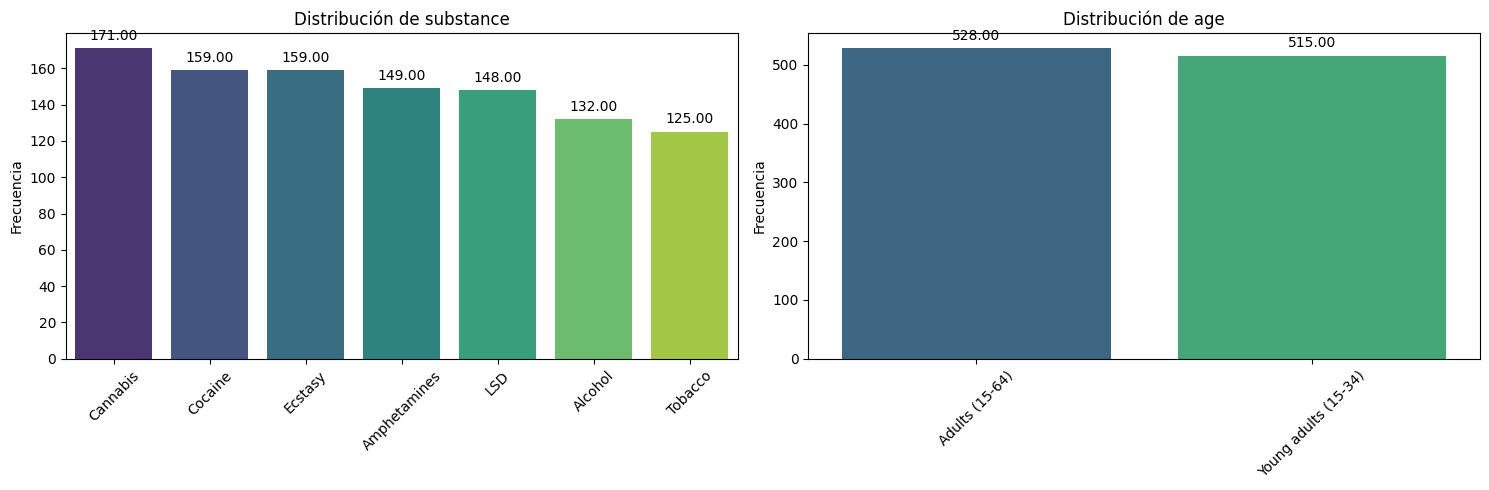

In [39]:
pinta_distribucion_categoricas(df_drugs, ["substance", "age"], relativa=False, mostrar_valores=True)

Y **relativos**

In [44]:
for catego in categorical_var:
	print(f"Para {catego}")
	print(df_drugs[catego].value_counts()/len(df_drugs)*100)
	print("/n"*2)

Para substance
substance
Cannabis        16.395014
Cocaine         15.244487
Ecstasy         15.244487
Amphetamines    14.285714
LSD             14.189837
Alcohol         12.655801
Tobacco         11.984660
Name: count, dtype: float64
/n/n
Para age
age
Adults (15-64)          50.623202
Young adults (15-34)    49.376798
Name: count, dtype: float64
/n/n


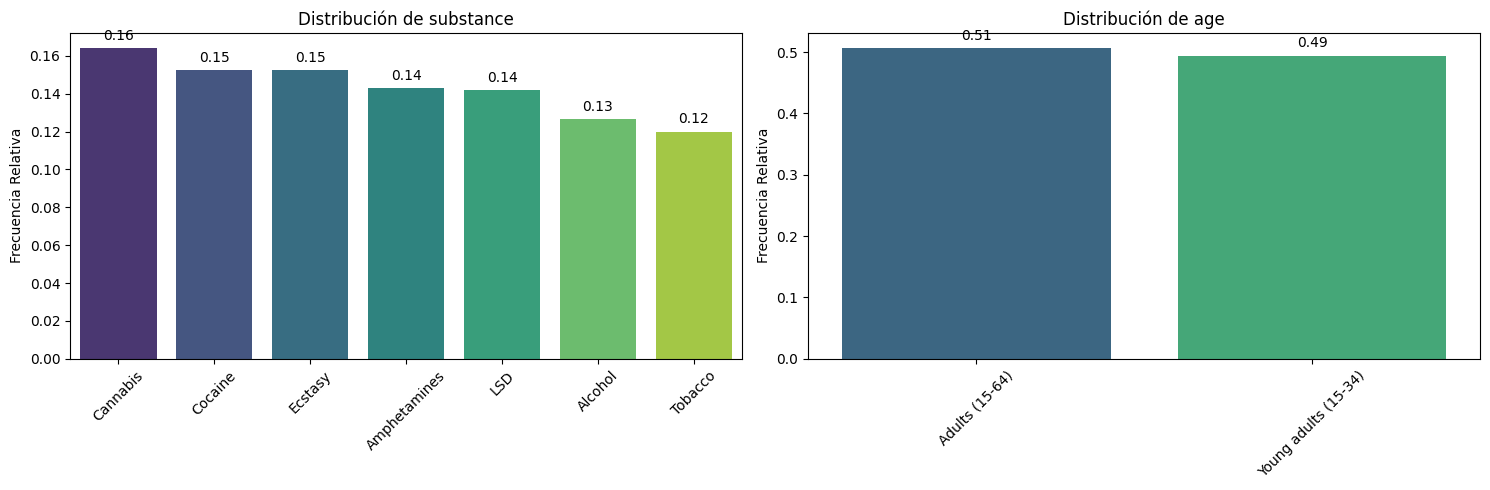

In [28]:
pinta_distribucion_categoricas(df_drugs, ["substance", "age"], relativa=True, mostrar_valores=True)

### 1.1.2 Análisis univariante de variables **Numéricas**

Las **variables numéricas** de nuestro dataframe relevantes para esta hipótesis son: prevalence, males y females

In [30]:
num_cols = columnas_numericas(df_drugs)
numeric_cols = [
    "prevalence_(%)",
    "males_(%)",
    "females_(%)",
]   

Mostramos, a continuación, una serie de **gráficas** para visualizar las variables (bloxplot y distribución, entre otras)

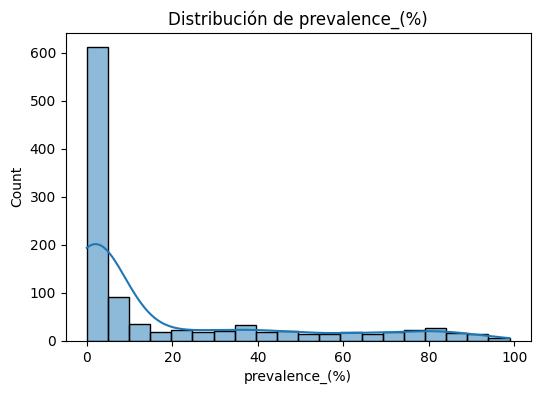

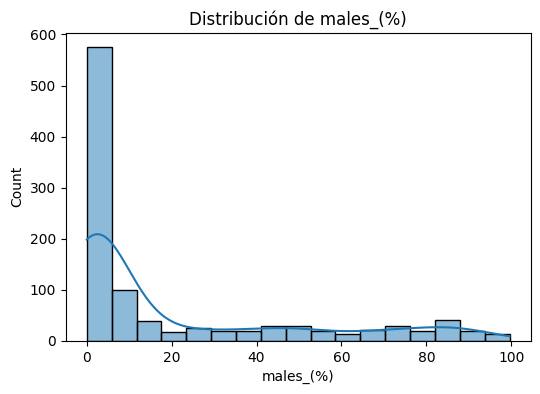

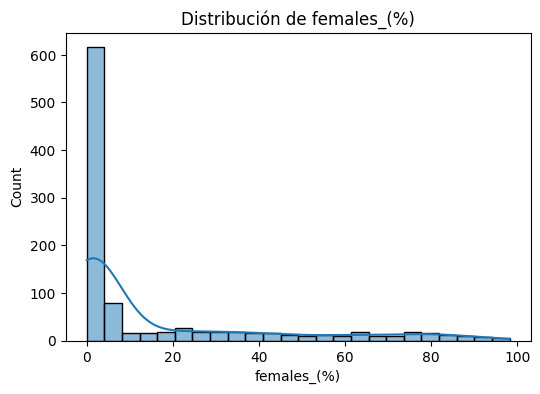

In [31]:
for col in numeric_cols:

    plt.figure(figsize=(6,4))

    sns.histplot(df_drugs[col], kde=True)

    plt.title(f"Distribución de {col}")

    plt.show()

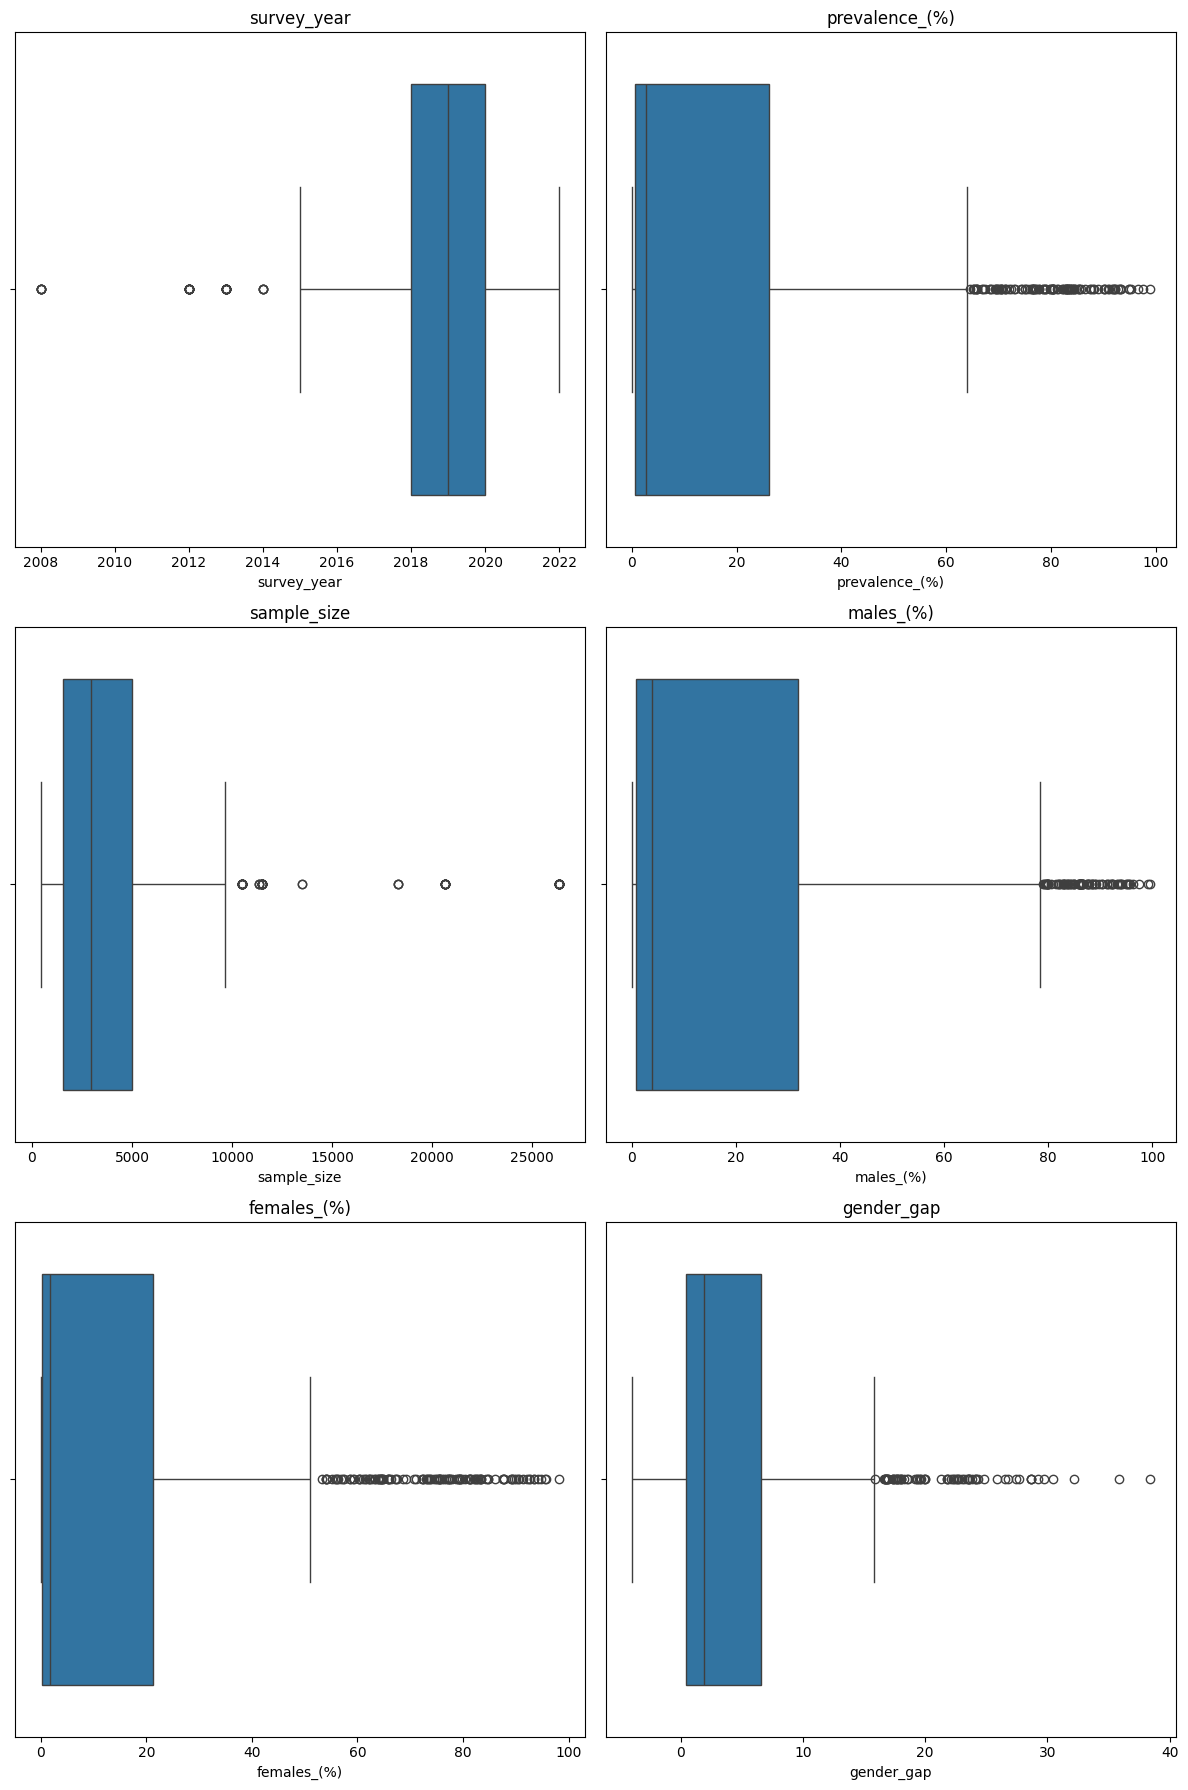

In [32]:
plot_multiple_boxplots(df_drugs, columns=num_cols)

También calculamos el rango (diferencia entre el valor máximo y mínimo) de cada variable numérica del dataset.

In [33]:
df_drugs.describe().loc["max"] - df_drugs.describe().loc["min"]

survey_year          14.0
prevalence_(%)       98.9
sample_size       25902.0
males_(%)            99.6
females_(%)          98.2
gender_gap           42.4
dtype: float64

Y hacemos una representación mediante histogramas:

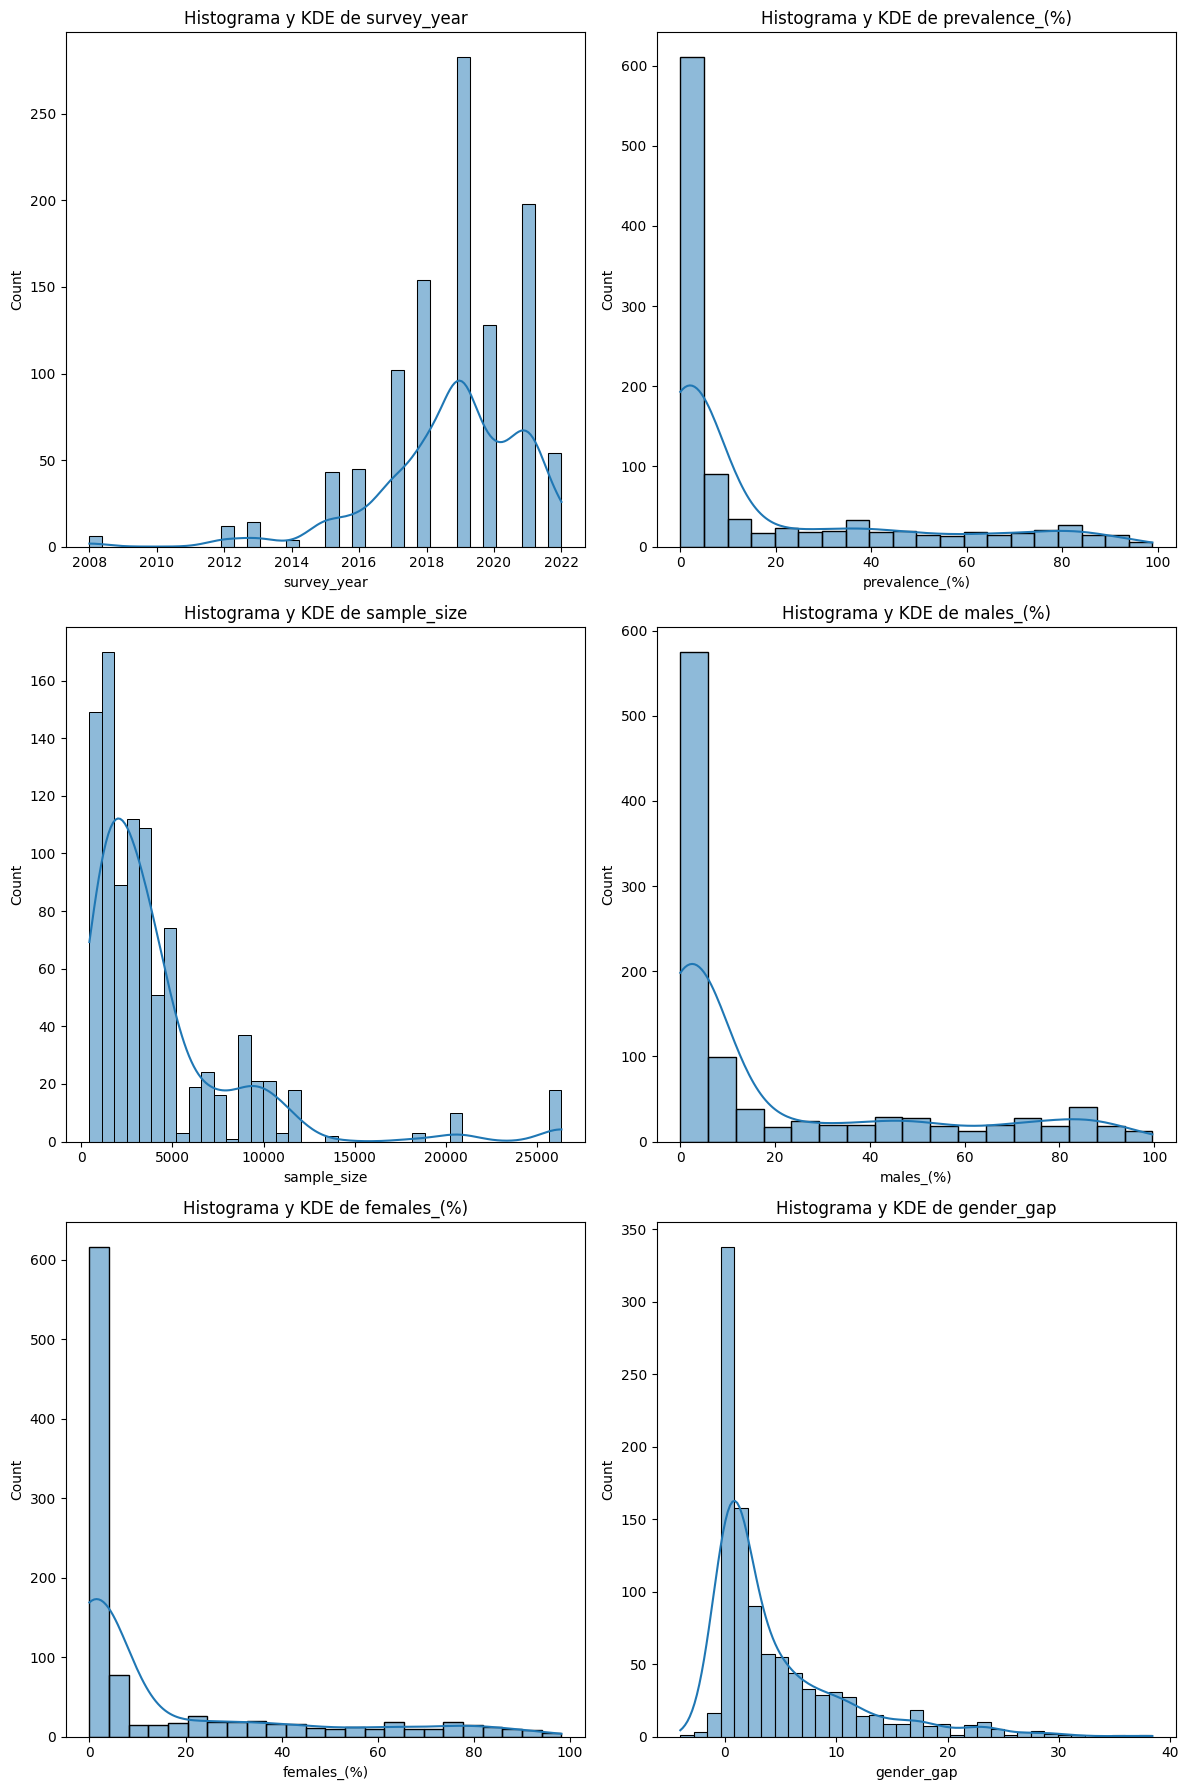

In [34]:
plot_histo_dens(df_drugs, columns=num_cols)

# **PONER QUÉ REPRESENTAN ESTAS GRÁFICAS O QUE NOS MUESTRAN!!!!!**

## 1.2 ANÁLISIS BIVARIANTE

Igual que con el análisis anterior, el bivariante lo vamos a dividir entre las variables categóricas y numéricas

## 3.1 ANÁLISIS MULTIVARIANTE

## CONCLUSIÓN

# **HIPÓTESIS 2**

*H2. Existen diferencias en la prevalencia del consumo de estupefacientes entre países europeos*

Igual que anteriormente, mostramos el dataframe:

In [45]:
df_drugs

,country,survey_year,prevalence_(%),substance,recall_period,age,sample_size,males_(%),females_(%),gender_gap
0,Austria,2020,22.7,Cannabis,Lifetime,Adults (15-64),4650.0,24.8,20.6,4.2
1,Austria,2020,27.2,Cannabis,Lifetime,Young adults (15-34),1712.0,26.8,27.6,-0.8
2,Austria,2020,6.3,Cannabis,Last year,Adults (15-64),4650.0,6.8,5.8,1.0
3,Austria,2020,11.1,Cannabis,Last year,Young adults (15-34),1712.0,10.7,11.4,-0.7
4,Austria,2020,3.6,Cannabis,Last month,Adults (15-64),4650.0,4.0,3.1,0.9
...,...,...,...,...,...,...,...,...,...,...
1038,Türkiye,2017,47.0,Tobacco,Lifetime,Young adults (15-34),NaN,61.9,33.2,28.7
1039,Türkiye,2017,33.4,Tobacco,Last year,Adults (15-64),NaN,45.0,22.5,22.5
1040,Türkiye,2017,33.2,Tobacco,Last year,Young adults (15-34),NaN,45.4,20.6,24.8
1041,Türkiye,2017,31.5,Tobacco,Last month,Adults (15-64),NaN,42.8,21.0,21.8


## 2.1 ANÁLISIS UNIVARIANTE

Las principales variables analizadas en esta hipótesis serán: country, recall_period, substance y age

Por ello, vamos a mostrar ciertos datos descriptivos para tener más información de las mismas

In [46]:
df_drugs["country"].describe()

count        1043
unique         29
top       Austria
freq           42
Name: country, dtype: object

In [47]:
df_drugs["recall_period"].describe()

count          1043
unique            3
top       Last year
freq            367
Name: recall_period, dtype: object

In [55]:
df_drugs["age"].describe()

count               1043
unique                 2
top       Adults (15-64)
freq                 528
Name: age, dtype: object

In [56]:
df_drugs["substance"].describe()

count         1043
unique           7
top       Cannabis
freq           171
Name: substance, dtype: object

### Variables **Categóricas**

Las variables categóricas de nuestro dataframe y que son relevantes para la presente hipótesis son: substance, country, recall_period y age

In [48]:
df_drugs.columns = df_drugs.columns.str.lower()

In [49]:
categorical_cols = [
    "country",    
    "substance",
    "recall_period",
    "age"
]

Hacemos el conteo de los valores:

In [50]:
from IPython.display import display
for col in categorical_cols:
    print(f"\n--- {col}---")
    display(df_drugs[col].value_counts(dropna=False))


--- country---


country
Austria        42
Bulgaria       42
Croatia        42
Cyprus         42
Germany        42
Portugal       42
Romania        42
Italy          42
Slovakia       42
Ireland        42
Latvia         41
Czechia        40
Lithuania      40
Hungary        38
Finland        38
Türkiye        38
Poland         36
Estonia        36
Spain          36
Luxembourg     36
Netherlands    34
Slovenia       34
Greece         32
Denmark        30
France         30
Norway         30
Sweden         22
Belgium        20
Malta          12
Name: count, dtype: int64


--- substance---


substance
Cannabis        171
Cocaine         159
Ecstasy         159
Amphetamines    149
LSD             148
Alcohol         132
Tobacco         125
Name: count, dtype: int64


--- recall_period---


recall_period
Last year     367
Lifetime      348
Last month    328
Name: count, dtype: int64


--- age---


age
Adults (15-64)          528
Young adults (15-34)    515
Name: count, dtype: int64

En esta tabla podemos ver el número y nombre de los países, las sustancias que se incluyen (como el alcohol), los períodos y los grupos de edad

Para aportar información al análisis, se presenta a continuación una gráfica relativa a los registros que se tienen respecto cada una de las sustancias:

**Sustancia**

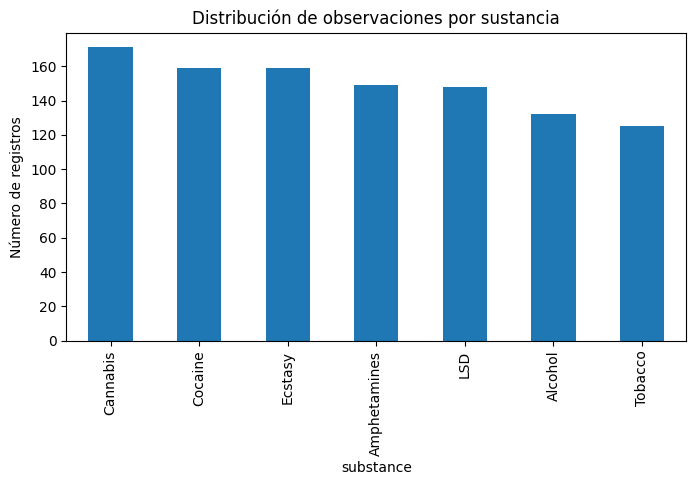

In [61]:
plt.figure(figsize=(8,4))

df_drugs["substance"].value_counts().plot(kind="bar")

plt.title("Distribución de observaciones por sustancia")

plt.ylabel("Número de registros")

plt.show()

Se muestra también un gráfico con los valores relativos:

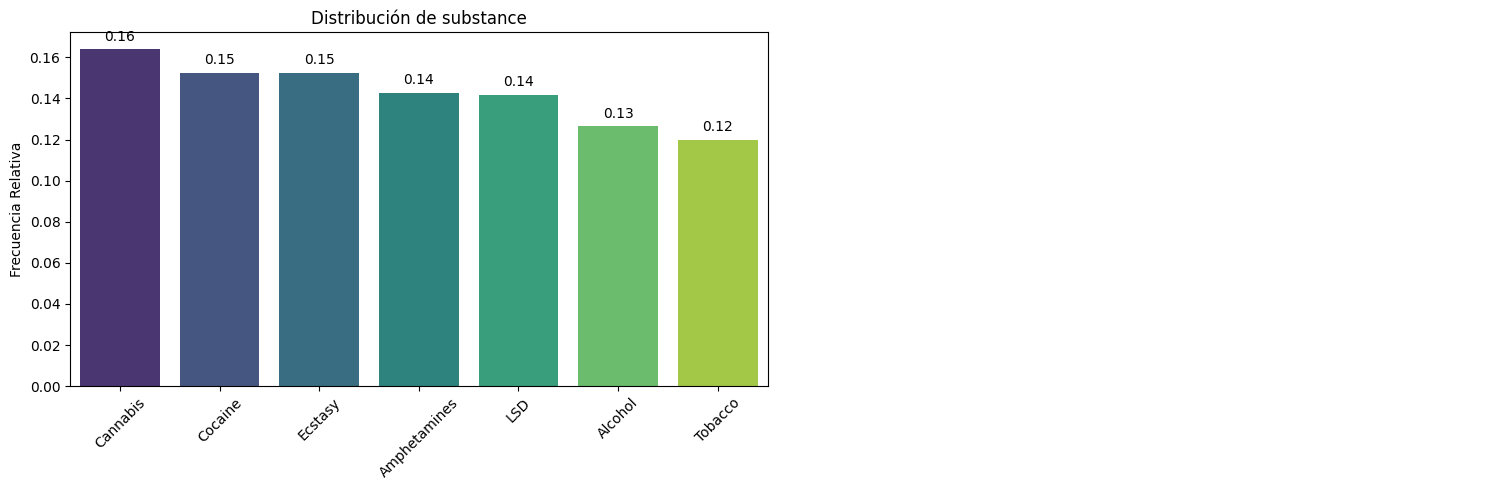

In [62]:
pinta_distribucion_categoricas(df_drugs, ["substance"], relativa=True, mostrar_valores=True)

**País**

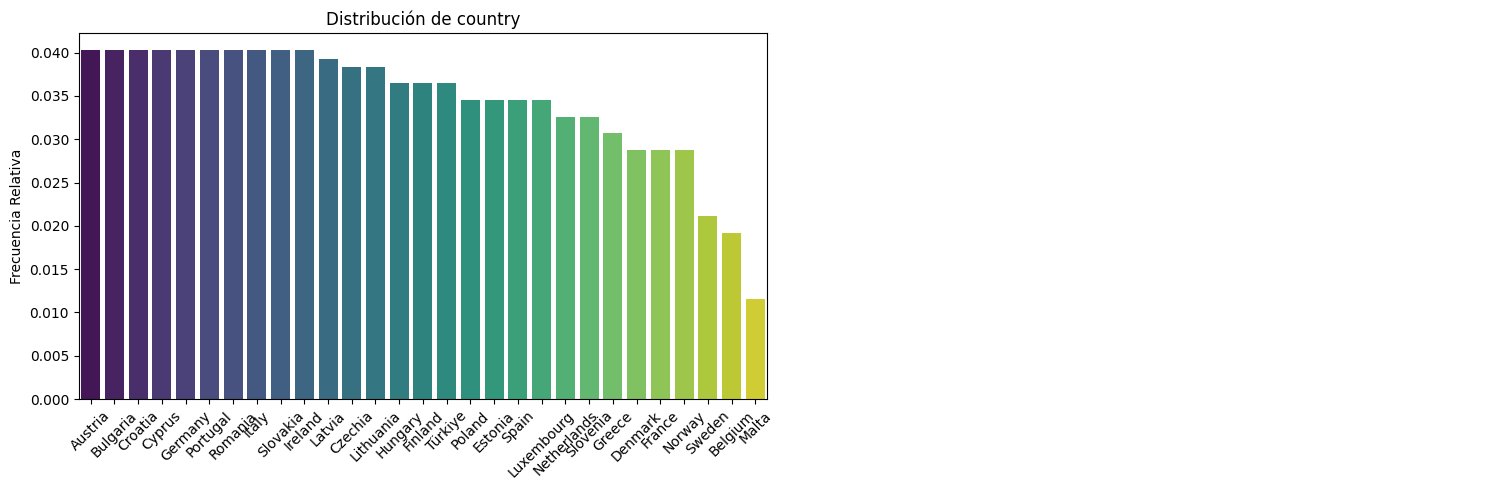

In [76]:
pinta_distribucion_categoricas(df_drugs, ["country"], relativa=True)

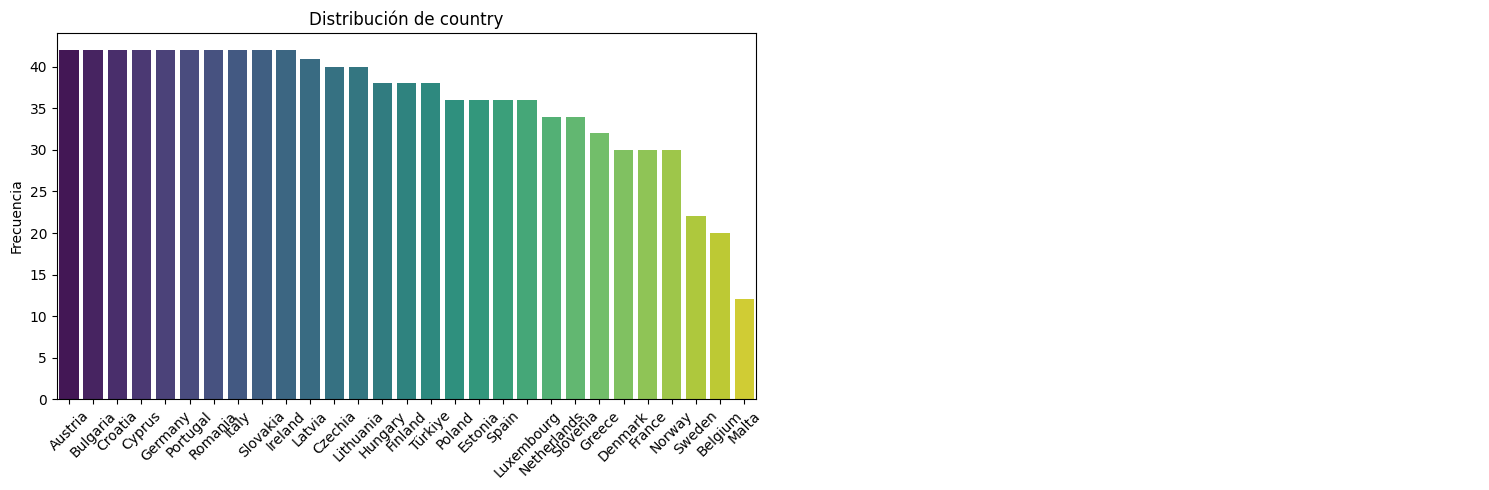

In [74]:
pinta_distribucion_categoricas(df_drugs, ["country"], relativa=False)

**Recall period**

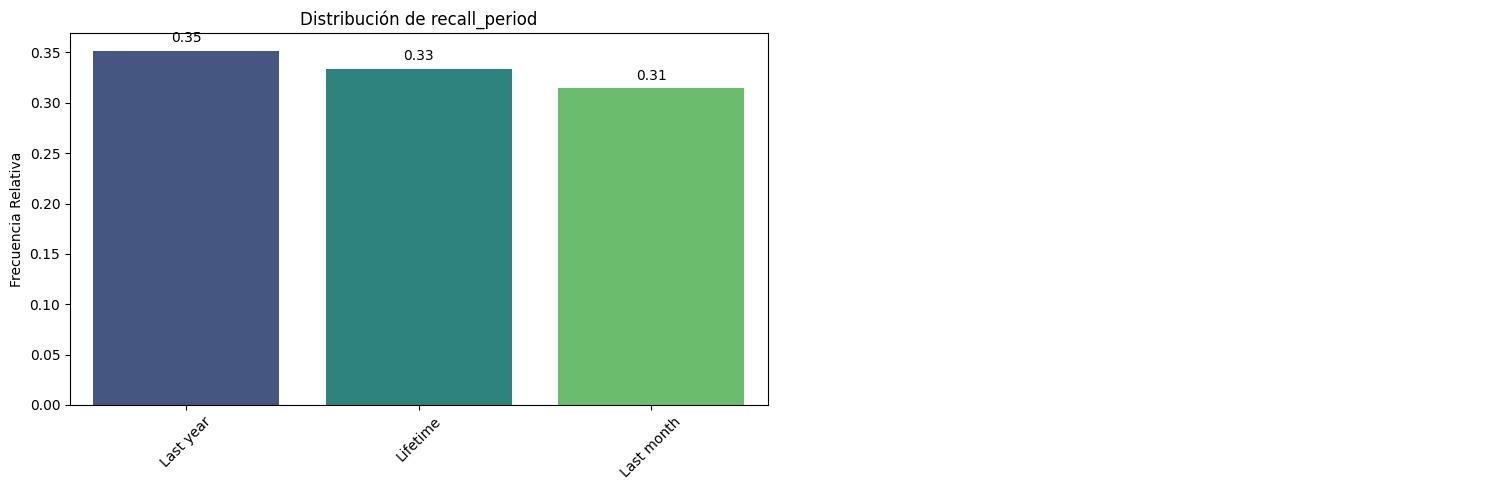

In [73]:
pinta_distribucion_categoricas(df_drugs, ["recall_period"], relativa=True, mostrar_valores=True)

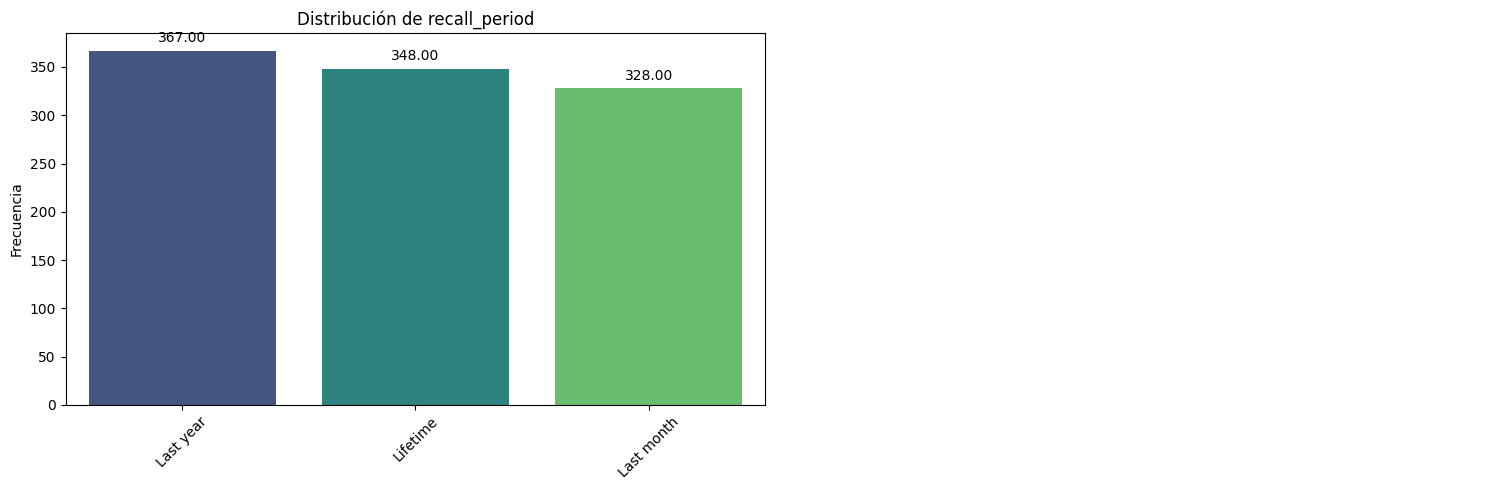

In [75]:
pinta_distribucion_categoricas(df_drugs, ["recall_period"], relativa=False, mostrar_valores=True)

### Variables **Numéricas**

Las variables numéricas de nuestro dataframe relevantes para esta hipótesis es prevalence

In [77]:
num_cols = columnas_numericas(df_drugs)

In [79]:
numeric_cols = [
    "prevalence_(%)",
]   

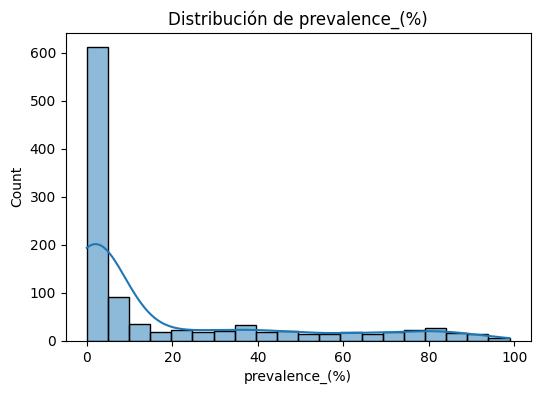

In [80]:
for col in numeric_cols:

    plt.figure(figsize=(6,4))

    sns.histplot(df_drugs[col], kde=True)

    plt.title(f"Distribución de {col}")

    plt.show()

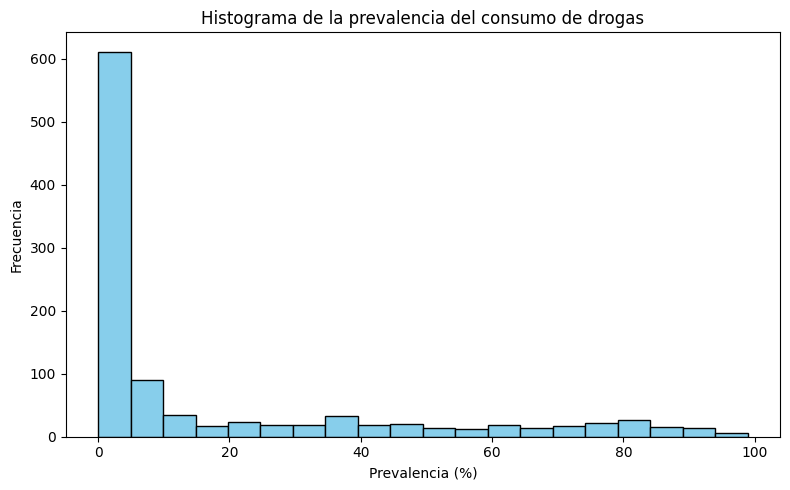

In [88]:
plt.figure(figsize=(8,5))

plt.hist(df_drugs["prevalence_(%)"], bins=20, color='skyblue', edgecolor='black')

plt.title("Histograma de la prevalencia del consumo de drogas")

plt.xlabel("Prevalencia (%)")

plt.ylabel("Frecuencia")

plt.tight_layout()

plt.show()

## 2.2 ANÁLISIS BIVARIANTE

## 2.3 ANÁLISIS MULTIVARIANTE

## CONCLUSIÓN